<a href="https://colab.research.google.com/github/karthickb77/TITANIC-SURVIVAL-PREDICTION/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path


In [15]:

# 1️⃣ Load Dataset

df=pd.read_csv('tested.csv')
print(df.head())

# show dataframe info (prints to stdout)
df.info()

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (

In [16]:
# 2️⃣ Check Missing Values
print("Missing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [17]:
# -------------------------------
# 3️⃣ Handle Missing Values
# -------------------------------

# Fill Age with Mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill Fare with Median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Fill Embarked with Mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column (too many missing values) if present
if 'Cabin' in df.columns:
	df = df.drop(columns=['Cabin'])


In [18]:
# -------------------------------
# 4️⃣ Convert Categorical to Numeric
# -------------------------------

# Convert Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert Embarked
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})



In [19]:
# 5️⃣ Final Check
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

print("\nCleaned Data Preview:")
print(df.head())


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Cleaned Data Preview:
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    0  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    1  47.0      1      0   
2                     Myles, Mr. Thomas Francis    0  62.0      0      0   
3                              Wirz, Mr. Albert    0  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.0      1      1   

    Ticket     Fare  Embarked  
0   330911   7.8292         2  
1   363

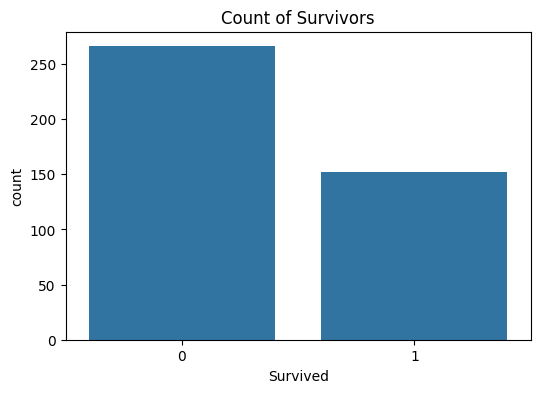

In [25]:
# 1️⃣ Survived Count
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=df)
plt.title("Count of Survivors")
plt.show()

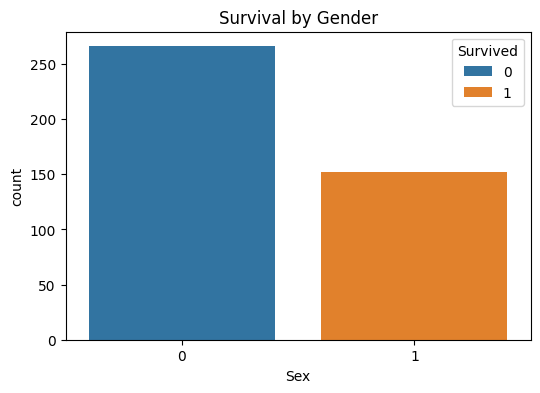

In [26]:
# 2️⃣ Survival by Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


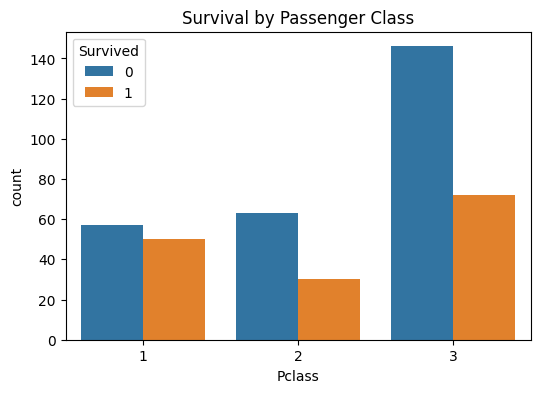

In [27]:
# 3️⃣ Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

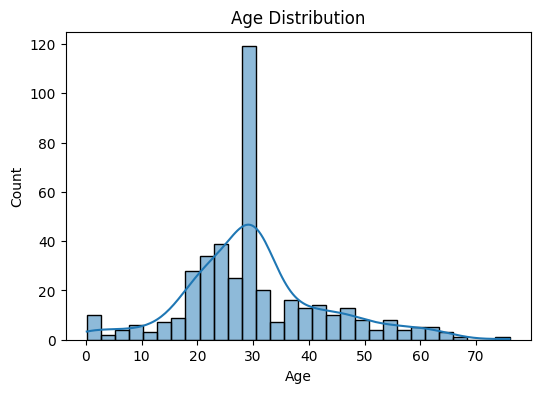

In [28]:
# 4️⃣ Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

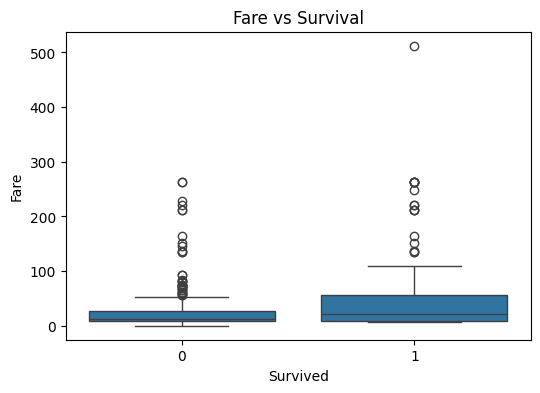

In [29]:
# 5️⃣ Fare Distribution
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

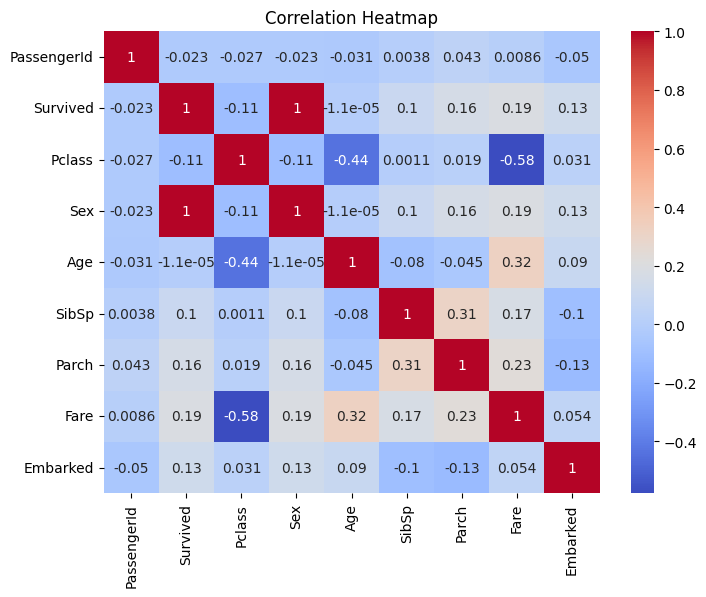

In [31]:
plt.figure(figsize=(8,6))

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()


In [32]:

X = df[['Pclass','Sex','Age','Fare','SibSp','Parch']]
print(X)
Y = df['Survived']
print(Y)

     Pclass  Sex       Age      Fare  SibSp  Parch
0         3    0  34.50000    7.8292      0      0
1         3    1  47.00000    7.0000      1      0
2         2    0  62.00000    9.6875      0      0
3         3    0  27.00000    8.6625      0      0
4         3    1  22.00000   12.2875      1      1
..      ...  ...       ...       ...    ...    ...
413       3    0  30.27259    8.0500      0      0
414       1    1  39.00000  108.9000      0      0
415       3    0  38.50000    7.2500      0      0
416       3    0  30.27259    8.0500      0      0
417       3    0  30.27259   22.3583      1      1

[418 rows x 6 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)



In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [35]:
from sklearn.metrics import accuracy_score
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0
